In [30]:
import pandas as pd
import pandana, time, os, pandas as pd, numpy as np
from pandana.loaders import osm
from shapely.geometry import Polygon, Point

In [2]:
import geopandas
import geojson 

polygons_df = geopandas.read_file(f'../geojson_files/dk_pop_1k_polygons.geojson')

polygons_df

,population_density,lon,lat,id,geometry
0,0.218567,10.586250,57.753750,0,"POLYGON ((10.58208 57.74958, 10.59042 57.74958..."
1,0.512380,10.594583,57.753750,1,"POLYGON ((10.59042 57.74958, 10.59875 57.74958..."
2,0.716782,10.602917,57.753750,2,"POLYGON ((10.59875 57.74958, 10.60708 57.74958..."
3,0.992388,10.611250,57.753750,3,"POLYGON ((10.60708 57.74958, 10.61542 57.74958..."
4,0.872486,10.619583,57.753750,4,"POLYGON ((10.61542 57.74958, 10.62375 57.74958..."
...,...,...,...,...,...
94672,0.296320,11.944583,54.562083,94672,"POLYGON ((11.94042 54.55792, 11.94875 54.55792..."
94673,2.932083,11.952917,54.562083,94673,"POLYGON ((11.94875 54.55792, 11.95708 54.55792..."
94674,1.779469,11.961250,54.562083,94674,"POLYGON ((11.95708 54.55792, 11.96542 54.55792..."
94675,3.801397,11.969583,54.562083,94675,"POLYGON ((11.96542 54.55792, 11.97375 54.55792..."


In [4]:
#poly_metadata_df = geopandas.read_file(f'dk_polygons_100m.json')

#poly_metadata_df

In [6]:
gdf = polygons_df

gdf

,population_density,lon,lat,id,geometry
0,0.218567,10.586250,57.753750,0,"POLYGON ((10.58208 57.74958, 10.59042 57.74958..."
1,0.512380,10.594583,57.753750,1,"POLYGON ((10.59042 57.74958, 10.59875 57.74958..."
2,0.716782,10.602917,57.753750,2,"POLYGON ((10.59875 57.74958, 10.60708 57.74958..."
3,0.992388,10.611250,57.753750,3,"POLYGON ((10.60708 57.74958, 10.61542 57.74958..."
4,0.872486,10.619583,57.753750,4,"POLYGON ((10.61542 57.74958, 10.62375 57.74958..."
...,...,...,...,...,...
94672,0.296320,11.944583,54.562083,94672,"POLYGON ((11.94042 54.55792, 11.94875 54.55792..."
94673,2.932083,11.952917,54.562083,94673,"POLYGON ((11.94875 54.55792, 11.95708 54.55792..."
94674,1.779469,11.961250,54.562083,94674,"POLYGON ((11.95708 54.55792, 11.96542 54.55792..."
94675,3.801397,11.969583,54.562083,94675,"POLYGON ((11.96542 54.55792, 11.97375 54.55792..."


#### This section creates the bounding box for searching for OSM data and adding it to the geojson file, currently it is not the entire country file, but rather a bbox of copenhagen which is used

In [9]:
margin = 0.000000000001
bbox_min_lon = polygons_df.lon.min() - margin
bbox_max_lon = polygons_df.lon.max() + margin

bbox_min_lat = polygons_df.lat.min() - margin
bbox_max_lat = polygons_df.lat.max() + margin


# doing it specifically for copenhagen here

bbox_min_lon = 12.3080 
bbox_max_lon = 12.7096

bbox_min_lat = 55.5416
bbox_max_lat = 55.7761

In [10]:
dk_bbox = [bbox_min_lon, bbox_min_lat, bbox_max_lon, bbox_max_lat]

dk_bbox

[12.308, 55.5416, 12.7096, 55.7761]

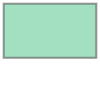

In [11]:
dk_bbox_polygon = Polygon([
                        [bbox_min_lon, bbox_min_lat],
                        [bbox_min_lon, bbox_max_lat],
                        [bbox_max_lon, bbox_max_lat],
                        [bbox_max_lon, bbox_min_lat],
                        [bbox_min_lon, bbox_min_lat]
                    ])
dk_bbox_polygon

In [12]:

temp_df =  polygons_df[polygons_df.geometry.within(dk_bbox_polygon)]

temp_df

,population_density,lon,lat,id,geometry
51577,165.166046,12.319583,55.770417,51577,"POLYGON ((12.31542 55.76625, 12.32375 55.76625..."
51578,168.394638,12.327917,55.770417,51578,"POLYGON ((12.32375 55.76625, 12.33208 55.76625..."
51579,103.640099,12.336250,55.770417,51579,"POLYGON ((12.33208 55.76625, 12.34042 55.76625..."
51580,98.206757,12.344583,55.770417,51580,"POLYGON ((12.34042 55.76625, 12.34875 55.76625..."
51581,79.473259,12.352917,55.770417,51581,"POLYGON ((12.34875 55.76625, 12.35708 55.76625..."
...,...,...,...,...,...
61764,14.762961,12.619583,55.562083,61764,"POLYGON ((12.61542 55.55792, 12.62375 55.55792..."
62172,11.002125,12.577917,55.553750,62172,"POLYGON ((12.57375 55.54958, 12.58208 55.54958..."
62173,34.579926,12.586250,55.553750,62173,"POLYGON ((12.58208 55.54958, 12.59042 55.54958..."
62174,29.629675,12.594583,55.553750,62174,"POLYGON ((12.59042 55.54958, 12.59875 55.54958..."


In [155]:
temp_df["lon"] = temp_df.geometry.x
temp_df["lat"] = temp_df.geometry.y

/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



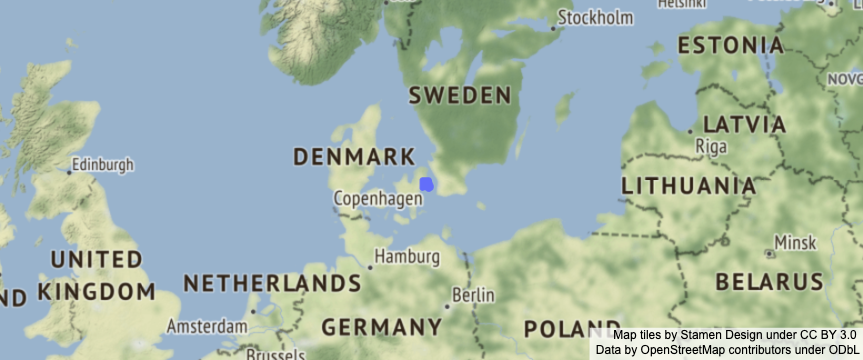

In [98]:
import plotly.express as px
 

#polygons_df["lon"] = polygons_df.geometry.x
#polygons_df["lat"] = polygons_df.geometry.y

px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(
        temp_df, 
        #pd.DataFrame({"lon":[0], "lat":[0]}),
        lon="lon", lat="lat", 
       # hover_data=["population_density"] + [f'avg_{ame}_dist' for ame in amenities],
       #size="population_density",
        #color='avg_bar_dist',
        color_continuous_scale="Viridis_r", #viridis reversed
        mapbox_style="outdoors",
    )

fig.update_layout(
    mapbox = {
        'style': "stamen-terrain",
        'center': { 'lon': bbox_min_lon + bbox_max_lon - bbox_min_lon, 'lat':  bbox_min_lat + bbox_max_lat - bbox_min_lat},
        'zoom': 4, 'layers': [{
            'source': {
                'type': "FeatureCollection",
                'features': [{
                    'type': "Feature",
                    'geometry': {
                        'type': "Polygon",
                        'coordinates': [[
                            [bbox_min_lon, bbox_min_lat],
                            [bbox_min_lon, bbox_max_lat],
                            [bbox_max_lon, bbox_max_lat],
                            [bbox_max_lon, bbox_min_lat],
                            [bbox_min_lon, bbox_min_lat],
                        ]]
                    }
                }]
            },
            'type': "fill", 'opacity': 0.5, 'below': "traces", 'color': "royalblue"}]},
    margin = {'l':0, 'r':0, 'b':0, 't':0})

## Iterate over the entire bbox of denmark by creating smaller bounding box

In [13]:
curr_bbox = dk_bbox_polygon

In [19]:
import importlib, sys
sys.path.append('../helper_scripts/')
from PandanaHandler import getAccessibilityMeasures
importlib.reload(sys.modules['PandanaHandler'])
from PandanaHandler import getAccessibilityMeasures


import numpy as np

max_width = 0.1
max_height = 0.1

acc_df = pd.DataFrame({})
for lon in np.arange(bbox_min_lon, bbox_max_lon, max_width):
    for lat in np.arange(bbox_min_lat, bbox_max_lat, max_height):
        curr_bbox = [lat, lon, lat+max_height, lon+max_width]
        bbox_polygon = Polygon([
                        [lon, lat],
                        [lon, lat+max_height],
                        [lon+max_width, lat+max_height],
                        [lon+max_width, lat],
                        [lon, lat]
                    ])
        print(bbox_polygon)
        polys = polygons_df[polygons_df.within(bbox_polygon)]
        if len(polys.index) > 0:
            #acc = acc + polys.index.tolist()
            print(curr_bbox)
            try:
                temp_df = getAccessibilityMeasures(bbox = curr_bbox)
                acc_df = acc_df.append(temp_df)
            except Exception as e:
                print(f'{e}')

POLYGON ((12.308 55.5416, 12.308 55.6416, 12.408 55.6416, 12.408 55.5416, 12.308 55.5416))
[55.5416, 12.308, 55.641600000000004, 12.408]
[55.5416, 12.308, 55.641600000000004, 12.408]
35 POIs loaded from CSV in 0.01 seconds
Network with 8,160 nodes loaded from HDF5 in 1.02 secs
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
POLYGON ((12.308 55.6416, 12.308 55.74160000000001, 12.408 55.74160000000001, 12.408 55.6416, 12.308 55.6416))
[55.641600000000004, 12.308, 55.741600000000005, 12.408]
[55.641600000000004, 12.308, 55.741600000000005, 12.408]
46 POIs loaded from CSV in 0.01 seconds
Network with 17,414 nodes loaded from HDF5 in 0.74 secs
Reading parameters from init_pois()
Readi

In [20]:
acc_df

,x,y,restaurant_distance,bar_distance,school_distance,toilets_distance,hospital_distance,college_distance
id,,,,,,,,
697428,12.347575,55.597827,524.836975,1000.000000,1000.0,910.924988,NaN,NaN
697430,12.357365,55.607552,944.416016,712.286011,1000.0,969.078003,NaN,NaN
697433,12.376276,55.616301,1000.000000,830.390991,1000.0,755.312012,NaN,NaN
697438,12.391303,55.628494,798.846985,1000.000000,1000.0,1000.000000,NaN,NaN
697445,12.336544,55.621936,1000.000000,1000.000000,1000.0,1000.000000,NaN,NaN
...,...,...,...,...,...,...,...,...
4445861418,12.747006,55.664862,1000.000000,NaN,NaN,1000.000000,NaN,NaN
4445884568,12.741745,55.667240,1000.000000,NaN,NaN,1000.000000,NaN,NaN
4445884575,12.741273,55.667273,1000.000000,NaN,NaN,1000.000000,NaN,NaN


In [21]:
acc_df.isnull().sum()

x                          0
y                          0
restaurant_distance        0
bar_distance              71
school_distance         4512
toilets_distance           0
hospital_distance      52406
college_distance       92793
dtype: int64

In [22]:
df = acc_df.fillna(1000)

In [23]:
df

,x,y,restaurant_distance,bar_distance,school_distance,toilets_distance,hospital_distance,college_distance
id,,,,,,,,
697428,12.347575,55.597827,524.836975,1000.000000,1000.0,910.924988,1000.0,1000.0
697430,12.357365,55.607552,944.416016,712.286011,1000.0,969.078003,1000.0,1000.0
697433,12.376276,55.616301,1000.000000,830.390991,1000.0,755.312012,1000.0,1000.0
697438,12.391303,55.628494,798.846985,1000.000000,1000.0,1000.000000,1000.0,1000.0
697445,12.336544,55.621936,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1000.0
...,...,...,...,...,...,...,...,...
4445861418,12.747006,55.664862,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1000.0
4445884568,12.741745,55.667240,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1000.0
4445884575,12.741273,55.667273,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1000.0


In [24]:
df.isnull().sum()

x                      0
y                      0
restaurant_distance    0
bar_distance           0
school_distance        0
toilets_distance       0
hospital_distance      0
college_distance       0
dtype: int64

In [25]:
df[df.isna().any(axis=1)]

,x,y,restaurant_distance,bar_distance,school_distance,toilets_distance,hospital_distance,college_distance
id,,,,,,,,


In [27]:
gdf = gdf[gdf.within(dk_bbox_polygon)]
gdf

,population_density,lon,lat,id,geometry
51577,165.166046,12.319583,55.770417,51577,"POLYGON ((12.31542 55.76625, 12.32375 55.76625..."
51578,168.394638,12.327917,55.770417,51578,"POLYGON ((12.32375 55.76625, 12.33208 55.76625..."
51579,103.640099,12.336250,55.770417,51579,"POLYGON ((12.33208 55.76625, 12.34042 55.76625..."
51580,98.206757,12.344583,55.770417,51580,"POLYGON ((12.34042 55.76625, 12.34875 55.76625..."
51581,79.473259,12.352917,55.770417,51581,"POLYGON ((12.34875 55.76625, 12.35708 55.76625..."
...,...,...,...,...,...
61764,14.762961,12.619583,55.562083,61764,"POLYGON ((12.61542 55.55792, 12.62375 55.55792..."
62172,11.002125,12.577917,55.553750,62172,"POLYGON ((12.57375 55.54958, 12.58208 55.54958..."
62173,34.579926,12.586250,55.553750,62173,"POLYGON ((12.58208 55.54958, 12.59042 55.54958..."
62174,29.629675,12.594583,55.553750,62174,"POLYGON ((12.59042 55.54958, 12.59875 55.54958..."


### Create the dataframe that will hold both population density and accessibility measures

In [28]:
amenities = ['restaurant', 'bar', 'school', 'toilets', 'college', 'hospital']#, 'hospital']

#all_df = pd.DataFrame({})

all_df = geopandas.GeoDataFrame(gdf[["lon", "lat", "population_density", "id", "geometry"]], geometry="geometry")

all_df["osm_node_count"] = 0

for ame in amenities:
    all_df[f'acc_{ame}_dist'] = 0

all_df.sindex    
    
all_df

,lon,lat,population_density,id,geometry,osm_node_count,acc_restaurant_dist,acc_bar_dist,acc_school_dist,acc_toilets_dist,acc_college_dist,acc_hospital_dist
51577,12.319583,55.770417,165.166046,51577,"POLYGON ((12.31542 55.76625, 12.32375 55.76625...",0,0,0,0,0,0,0
51578,12.327917,55.770417,168.394638,51578,"POLYGON ((12.32375 55.76625, 12.33208 55.76625...",0,0,0,0,0,0,0
51579,12.336250,55.770417,103.640099,51579,"POLYGON ((12.33208 55.76625, 12.34042 55.76625...",0,0,0,0,0,0,0
51580,12.344583,55.770417,98.206757,51580,"POLYGON ((12.34042 55.76625, 12.34875 55.76625...",0,0,0,0,0,0,0
51581,12.352917,55.770417,79.473259,51581,"POLYGON ((12.34875 55.76625, 12.35708 55.76625...",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61764,12.619583,55.562083,14.762961,61764,"POLYGON ((12.61542 55.55792, 12.62375 55.55792...",0,0,0,0,0,0,0
62172,12.577917,55.553750,11.002125,62172,"POLYGON ((12.57375 55.54958, 12.58208 55.54958...",0,0,0,0,0,0,0
62173,12.586250,55.553750,34.579926,62173,"POLYGON ((12.58208 55.54958, 12.59042 55.54958...",0,0,0,0,0,0,0
62174,12.594583,55.553750,29.629675,62174,"POLYGON ((12.59042 55.54958, 12.59875 55.54958...",0,0,0,0,0,0,0


### Create a geoseries from the OSM nodes and add a spatial index so we can search fast later

In [31]:
s2 = geopandas.GeoSeries([Point(x,y) for (x,y) in df[["x", "y"]].values])


s2.sindex

rtree.index.Index(bounds=[12.2985868, 55.5597977, 12.7501508, 55.845643], size=135710)

### Go through each polygon in the bbox of the calcuation, and accumulate the distance for each points within that polygon

In [40]:
import time

size = len(all_df)
start_time = time.time()

all_df_columns = all_df.columns.tolist()

for i, poly in enumerate(all_df["geometry"].values):
    # query spatial index, to find osm nodes inside "poly"
    results = s2.sindex.query(poly)
    
    if i % 10 == 0:
        print(f'{i} of {size}', end='\r')
        
    # found osm nodes that are inside polygon
    if len(results) > 0:
        
        poly_row = all_df.iloc[i]
        
        # update row with values from osm nodes found from query
        for col_i, ame in enumerate(amenities):
            col_index = all_df_columns.index(f'acc_{ame}_dist')
            all_df.iloc[i, col_index] = poly_row[f'acc_{ame}_dist'] + df.iloc[results][f'{ame}_distance'].sum()
        
        col_index = all_df_columns.index("osm_node_count")
        all_df.iloc[i, col_index] = len(results)

        
print(f'Time taken: {time.time() - start_time}')
        

Time taken: 3.629938840866089


In [41]:
all_df

,lon,lat,population_density,id,geometry,osm_node_count,acc_restaurant_dist,acc_bar_dist,acc_school_dist,acc_toilets_dist,acc_college_dist,acc_hospital_dist
51577,12.319583,55.770417,165.166046,51577,"POLYGON ((12.31542 55.76625, 12.32375 55.76625...",40,120000.000000,120000.0,120000.0,120000.000000,120000.0,120000.0
51578,12.327917,55.770417,168.394638,51578,"POLYGON ((12.32375 55.76625, 12.33208 55.76625...",45,135000.000000,135000.0,135000.0,135000.000000,135000.0,135000.0
51579,12.336250,55.770417,103.640099,51579,"POLYGON ((12.33208 55.76625, 12.34042 55.76625...",79,236000.432922,237000.0,237000.0,237000.000000,237000.0,237000.0
51580,12.344583,55.770417,98.206757,51580,"POLYGON ((12.34042 55.76625, 12.34875 55.76625...",34,102000.000000,102000.0,102000.0,102000.000000,102000.0,102000.0
51581,12.352917,55.770417,79.473259,51581,"POLYGON ((12.34875 55.76625, 12.35708 55.76625...",24,72000.000000,72000.0,72000.0,70632.794861,72000.0,72000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
61764,12.619583,55.562083,14.762961,61764,"POLYGON ((12.61542 55.55792, 12.62375 55.55792...",1,3000.000000,3000.0,3000.0,3000.000000,3000.0,3000.0
62172,12.577917,55.553750,11.002125,62172,"POLYGON ((12.57375 55.54958, 12.58208 55.54958...",0,0.000000,0.0,0.0,0.000000,0.0,0.0
62173,12.586250,55.553750,34.579926,62173,"POLYGON ((12.58208 55.54958, 12.59042 55.54958...",0,0.000000,0.0,0.0,0.000000,0.0,0.0
62174,12.594583,55.553750,29.629675,62174,"POLYGON ((12.59042 55.54958, 12.59875 55.54958...",0,0.000000,0.0,0.0,0.000000,0.0,0.0


### Now calculate average distances for each amenity

In [43]:
for ame in amenities:
    all_df[f'avg_{ame}_dist'] = all_df[f'acc_{ame}_dist']/all_df["osm_node_count"]

In [45]:
all_df.head(5)

,lon,lat,population_density,id,geometry,osm_node_count,acc_restaurant_dist,acc_bar_dist,acc_school_dist,acc_toilets_dist,acc_college_dist,acc_hospital_dist,avg_restaurant_dist,avg_bar_dist,avg_school_dist,avg_toilets_dist,avg_college_dist,avg_hospital_dist
51577,12.319583,55.770417,165.166046,51577,"POLYGON ((12.31542 55.76625, 12.32375 55.76625...",40,120000.000000,120000.0,120000.0,120000.000000,120000.0,120000.0,3000.000000,3000.0,3000.0,3000.000000,3000.0,3000.0
51578,12.327917,55.770417,168.394638,51578,"POLYGON ((12.32375 55.76625, 12.33208 55.76625...",45,135000.000000,135000.0,135000.0,135000.000000,135000.0,135000.0,3000.000000,3000.0,3000.0,3000.000000,3000.0,3000.0
51579,12.336250,55.770417,103.640099,51579,"POLYGON ((12.33208 55.76625, 12.34042 55.76625...",79,236000.432922,237000.0,237000.0,237000.000000,237000.0,237000.0,2987.347252,3000.0,3000.0,3000.000000,3000.0,3000.0
51580,12.344583,55.770417,98.206757,51580,"POLYGON ((12.34042 55.76625, 12.34875 55.76625...",34,102000.000000,102000.0,102000.0,102000.000000,102000.0,102000.0,3000.000000,3000.0,3000.0,3000.000000,3000.0,3000.0
51581,12.352917,55.770417,79.473259,51581,"POLYGON ((12.34875 55.76625, 12.35708 55.76625...",24,72000.000000,72000.0,72000.0,70632.794861,72000.0,72000.0,3000.000000,3000.0,3000.0,2943.033119,3000.0,3000.0


In [46]:
all_df[(all_df.acc_restaurant_dist < 1000) & (all_df.acc_restaurant_dist != 0)]

,lon,lat,population_density,id,geometry,osm_node_count,acc_restaurant_dist,acc_bar_dist,acc_school_dist,acc_toilets_dist,acc_college_dist,acc_hospital_dist,avg_restaurant_dist,avg_bar_dist,avg_school_dist,avg_toilets_dist,avg_college_dist,avg_hospital_dist


### export to csv

In [50]:
all_df.to_csv("../csv_files/cph_pop_and_access_100m.csv")

### Plot the newly acquired dataset which has population density and accessibility measures

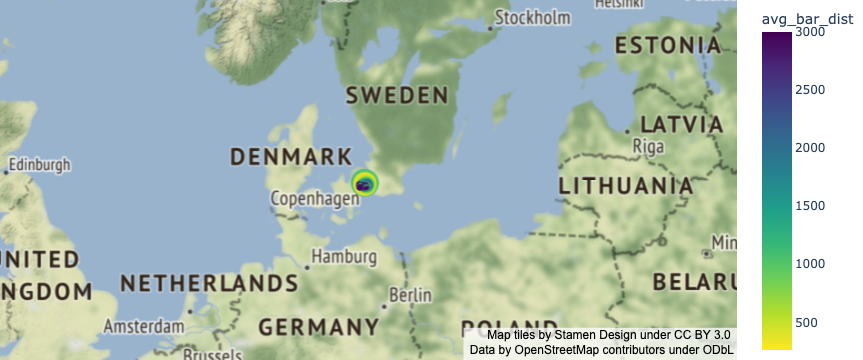

In [53]:
import plotly.express as px
 

#polygons_df["lon"] = polygons_df.geometry.x
#polygons_df["lat"] = polygons_df.geometry.y

px.set_mapbox_access_token(open("../.mapbox_token").read())
fig = px.scatter_mapbox(
        all_df, 
        #pd.DataFrame({"lon":[0], "lat":[0]}),
        lon="lon", lat="lat", 
       # hover_data=["population_density"] + [f'avg_{ame}_dist' for ame in amenities],
        size="population_density",
        color='avg_bar_dist',
        color_continuous_scale="Viridis_r", #viridis reversed
        mapbox_style="outdoors",
    )

fig.update_layout(
    mapbox = {
        'style': "stamen-terrain",
        'center': { 'lon': bbox_min_lon + bbox_max_lon - bbox_min_lon, 'lat':  bbox_min_lat + bbox_max_lat - bbox_min_lat},
        'zoom': 4, 'layers': [{
            'source': {
                'type': "FeatureCollection",
                'features': [{
                    'type': "Feature",
                    'geometry': {
                        'type': "Polygon",
                        'coordinates': [[
                            [bbox_min_lon, bbox_min_lat],
                            [bbox_min_lon, bbox_max_lat],
                            [bbox_max_lon, bbox_max_lat],
                            [bbox_max_lon, bbox_min_lat],
                            [bbox_min_lon, bbox_min_lat],
                        ]]
                    }
                }]
            },
            'type': "fill", 'opacity': 0.5, 'below': "traces", 'color': "royalblue"}]},
    margin = {'l':0, 'r':0, 'b':0, 't':0})